In [2]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


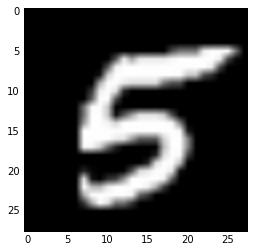

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np #para trabajar con matrices

plt.imshow(mnist.train.images[3].reshape(28,28), cmap='gray')
plt.imshow(mnist.train.images[56].reshape(28,28), cmap='gray')

In [4]:
#datos que ingresan
x = tf.placeholder(tf.float32, [None, 784]) #DATOS QUE NO SE ENTRENAN

#son las salidas ideales, sirve para entrenar la red neuronal
y_ = tf.placeholder(tf.float32, [None, 10])

#perceptron simple
'''
#pesos
W = tf.Variable(tf.zeros([784, 10])) #NUNCA SE DEBE INICIALIZAR EN ZEROS

#bias
B = tf.Variable(tf.zeros([10])) #SOLO POR ESTE EJEMPLO SE DEJA EN ZEROS
'''

#perceptron multicapa
#pesos no pueden inicializar en cero porque ya es multicapa
#inicialziara con valores random en una distribucion normal
#definiendo bien la desviacion estandar 

n_hidden = 250

W0 = tf.Variable(tf.random_normal([784, n_hidden], stddev=0.01))
#bias
B0 = tf.Variable(tf.random_normal([n_hidden], stddev=0.01))

W1 = tf.Variable(tf.random_normal([n_hidden, 10], stddev=0.01)) 
#bias
B1 = tf.Variable(tf.random_normal([10], stddev=0.01))



#definicion de la red neuronal

#nn.tanh lo da tensorflow
#matmul es multiplicacion de matrices, si ponemos directo * estaria
#multiplicando elemento por elemente y dara error porque las matrices
#no tienen el mismo tamano

#perceptron simple
'''
y = tf.nn.tanh(tf.matmul(x, W) + B)
'''


#perceptron multicapa
h = tf.nn.tanh(tf.matmul(x, W0) + B0)
y = tf.nn.tanh(tf.matmul(h, W1) + B1)



#debemos entrenar la red neuronal

#funcion de error
#sacamos la media, porque la resta puede dar problemas al evaluar
#el valor correcto ya que puede ser positivo o negativo
#calcular la media por cada tipo de imagen
mse = tf.reduce_mean(tf.square(y - y_))

#optimizacion de la funcion de error
#0.01 la velocidad de aprendizaje, con que velocidad se optimizar 
#los parametros

#perceptron simple
'''
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(mse)
'''

#perceptron multicapa
train_step = tf.train.AdamOptimizer(0.005).minimize(mse)

#iniciar tensorflow para que realize el trabajo
init = tf.initialize_all_variables()
sess = tf.Session()

sess.run(init)

In [5]:
'''
realizacion del entrenamiento, el primer pensamiento es entrenar
con todas las imagenes, pero computacionalmente es complicado
lo que se hace es entrenar con un conjunto (proceso estocastico)

se debe hacer un grafico de aprendizaje
'''

trainLoss = []
testLoss = []


for i in range(80):
    batchX, batchY = mnist.train.next_batch(500)
    sess.run(train_step, feed_dict={x:batchX, y_:batchY})
    
    loss1 = sess.run(mse, feed_dict={x:batchX, y_:batchY})
    loss2 = sess.run(mse, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    
    trainLoss.append(loss1)
    testLoss.append(loss2)

print 'training finished'


training finished


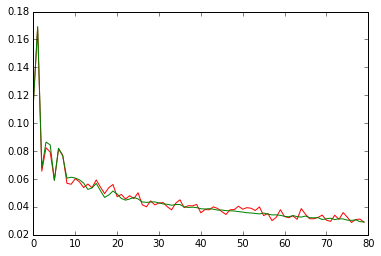

In [6]:
#para este metodo Adam, es no convexo, asi que encontro minimos locales,
#de ahi los picos en el desenso pero al final, se normalizo
plt.plot(trainLoss, 'r')
plt.plot(testLoss, 'g')

In [7]:
#existe ruido en el entrenamiento porque solo hemos usado un muestreo
#predicciones de la red neuronal para el conjunto de test
pred = sess.run(y, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
print pred

[[-0.03656668  0.03950519  0.04677232 ...,  0.86594677 -0.06344931
  -0.06950092]
 [ 0.14512607  0.04761834  0.88987267 ..., -0.00815748 -0.03976309
   0.01831895]
 [ 0.00467595  0.79464662 -0.01623457 ...,  0.07048506 -0.10854122
  -0.02948711]
 ..., 
 [-0.080063    0.04515345 -0.04149821 ...,  0.02995448 -0.03247561
   0.45149577]
 [-0.14736708  0.06492566 -0.05832635 ...,  0.01405516  0.24317452
  -0.07588152]
 [-0.01967049  0.05509159 -0.04252474 ..., -0.02337165 -0.09115626
   0.03086905]]


In [8]:
# importante poner el punto 0. porque sino lo toma como int y da errores
errors = 0.

#pred.shape[0] el numero de imagenes que le pasamos a la red neuronal
for i in range(pred.shape[0]):
    #argmax devuelve el indice del elemento mayor de un vector
    #la prediccion es la misma que la imagen
    if(np.argmax(pred[i]) != np.argmax(mnist.test.labels[i])):
        errors = errors + 1
        
print 'test error: ' + str(errors/pred.shape[0])


test error: 0.1053


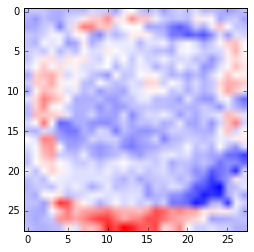

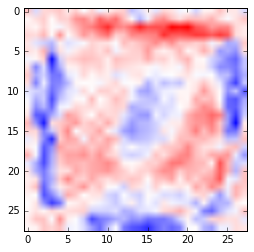

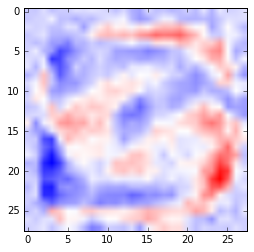

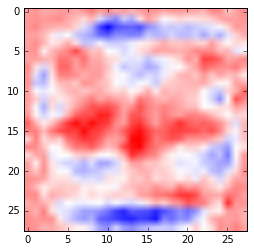

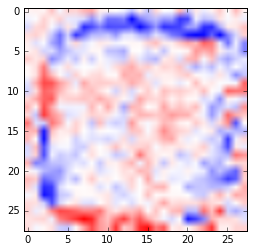

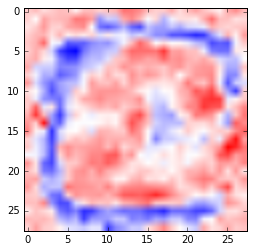

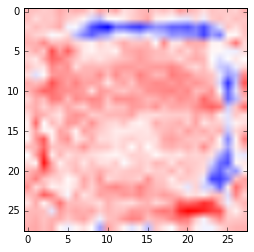

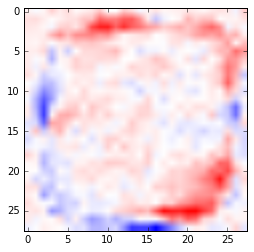

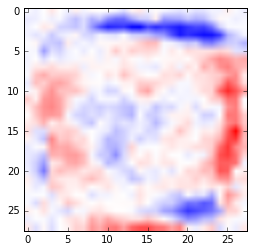

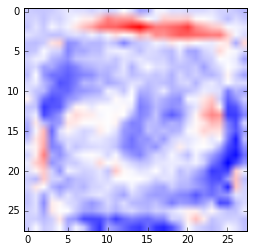

In [9]:
#podemos mostrar una imagen de los patrones que va formando
#la red neuronal en los pesos

myW = sess.run(W0)
for i in range(10):
    #myW[:,i] esto es que quiero todas las valores de la columna i
    plt.imshow(myW[:, i].reshape(28, 28), cmap='bwr')
    plt.show()